In [118]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Input variables:
   #### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m(Euro Interbank Offered Rate, the official interest rate offered by banks): euribor 3 month rate - daily                indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
df=pd.read_csv("bank-additional-full.csv", delimiter=';')

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(f"Shape of the data_set\nNumber of rows: {df.shape[0]}\nNumber of features: {df.shape[1]}")

Shape of the data_set
Number of rows: 41188
Number of features: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
## To check how many tearm depositers are there in the data

df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
## To check the baseline Likelihood of term depositors in the data in the absence of ML models

In [10]:
df['target']=np.where(df['y'].isin(['yes']),1,0)

In [11]:
df['target'].mean()
## out of 100 calls made 11 of them take a tearm loan with out any intervention of ML (Event rate of taking a loan is 11%)

0.11265417111780131

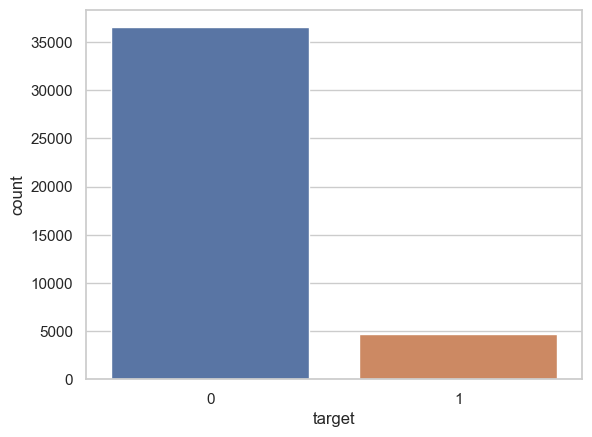

In [12]:
sns.countplot(x='target', data=df)
plt.show()

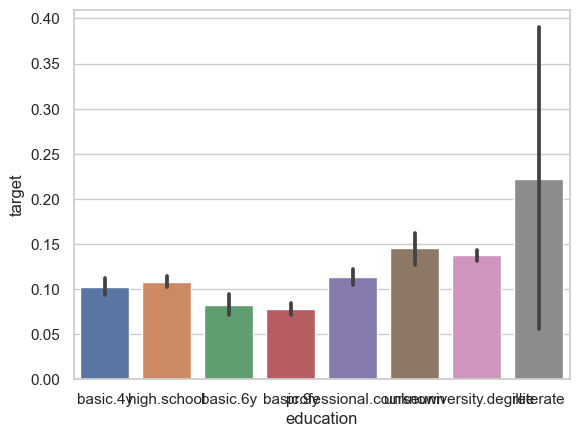

In [13]:
## checking the probability rate of taking a teram loan amongst education holders 
from numpy import mean
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)

In [14]:
df.groupby('education')['target'].mean()

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64

In [15]:
## combining all basic's into one basics and combining illiterate's into unknown
df['education']= np.where(df['education']=='basic.9y', 'Basic', df['education'])
df['education']= np.where(df['education']=='basic.6y', 'Basic', df['education'])
df['education']= np.where(df['education']=='basic.4y', 'Basic', df['education'])
df['education']= np.where(df['education']=='illiterate', 'unknown', df['education'])

In [16]:
df.groupby('education')['target'].mean()

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64

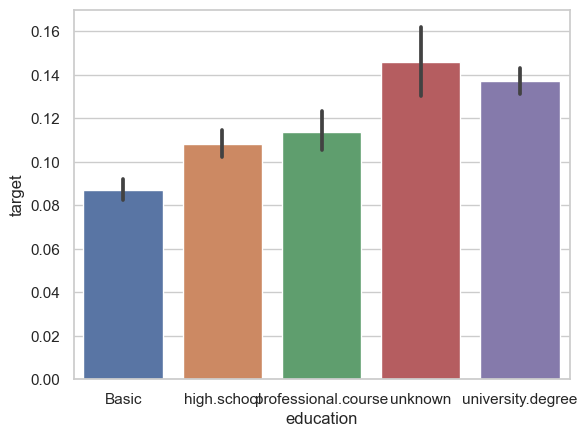

In [17]:
ax = sns.barplot(x="education", y="target", data=df, estimator=mean)
## good predictor 

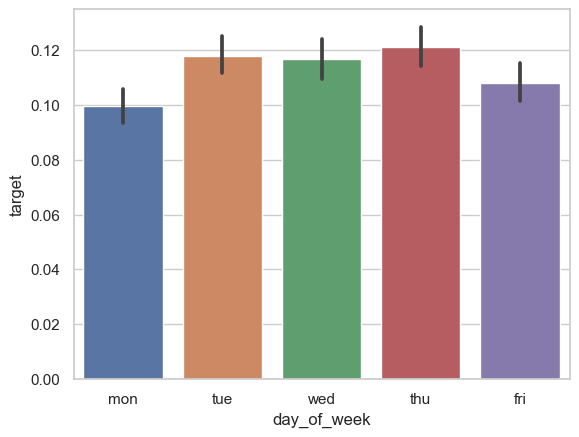

In [18]:
### Checking if the day of the week has any impact on taking a tearm_loan
ax = sns.barplot(x="day_of_week", y="target", data=df, estimator=mean)

#### (we can not discriminate as we do not see any trends(slope) in the data)
## Not a good predictor 

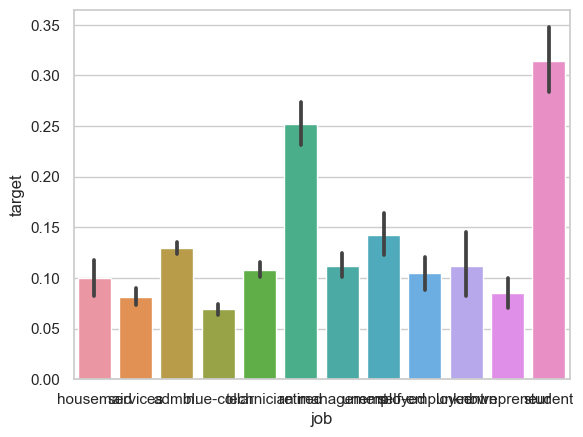

In [19]:
### Checking if the profession has any impact on taking a tearm_loan
ax = sns.barplot(x="job", y="target", data=df, estimator=mean)
## good predictor 

In [20]:
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64

In [21]:
## grouping unknow's into umemployed category
df['job']= np.where(df['job']=='unknown', 'unemployed', df['job'])

In [22]:
df.groupby('job')['target'].mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64

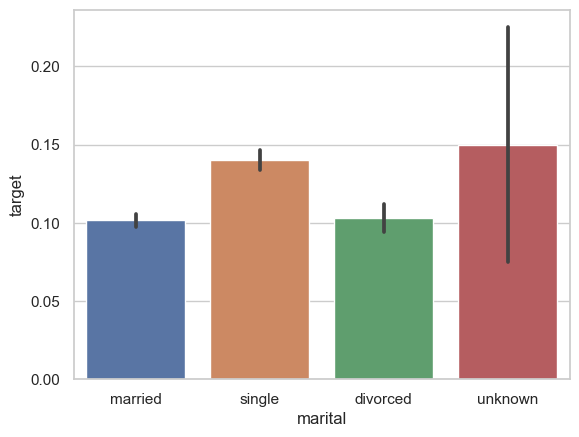

In [23]:
### Checking if marital status has any impact on taking a tearm_loan
ax = sns.barplot(x="marital", y="target", data=df, estimator=mean)
## Not a good predictor 

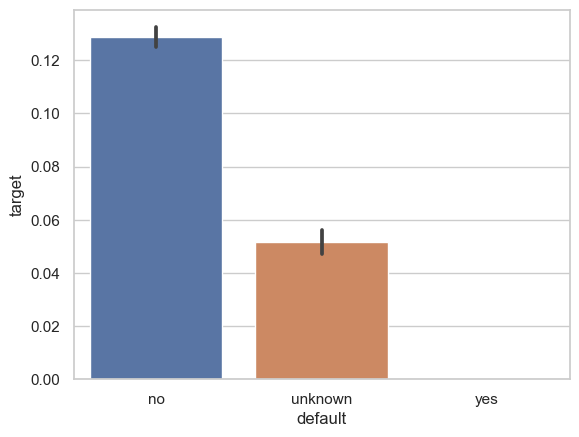

In [24]:
### Checking if ppl who have defaulted has any impact on taking a tearm_loan
ax = sns.barplot(x="default", y="target", data=df, estimator=mean)

In [25]:
df.groupby('default')['target'].count()

default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64

In [26]:
### grouping unknow's into Yes category
df['default']= np.where(df['default']=='unknown', 'yes', df['default'])
df.groupby('default')['target'].count()

default
no     32588
yes     8600
Name: target, dtype: int64

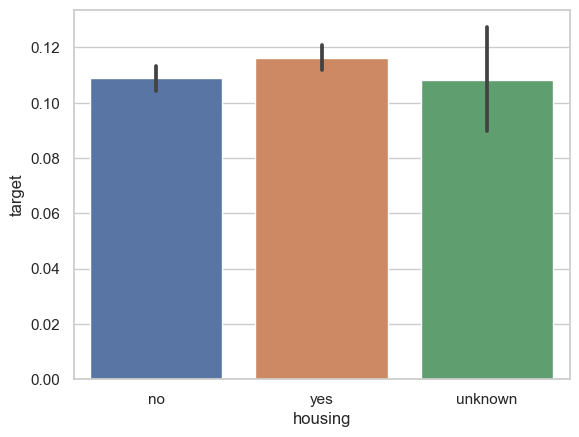

In [27]:
### Checking if housing has any impact on taking a tearm_loan
ax = sns.barplot(x="housing", y="target", data=df, estimator=mean)
## Not a good predictor 

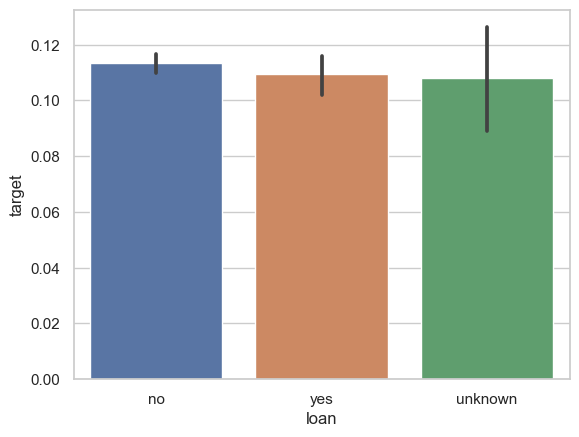

In [28]:
ax = sns.barplot(x="loan", y="target", data=df, estimator=mean)
## Not a good predictor 

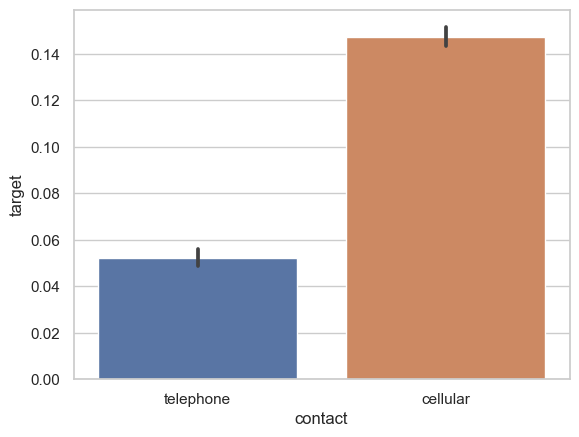

In [29]:
### Checking if the mode of communication has any impact on taking a tearm_loan
ax = sns.barplot(x="contact", y="target", data=df, estimator=mean)
## Good predictor 

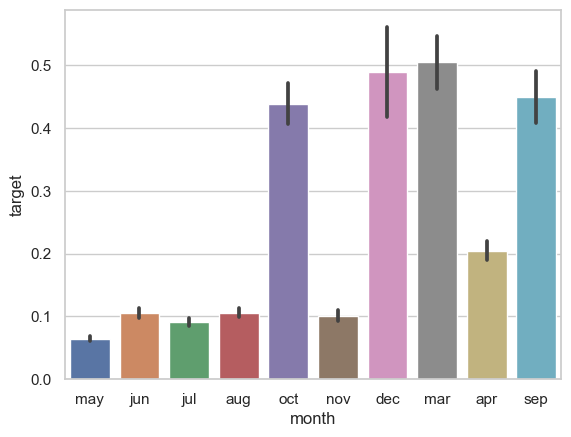

In [30]:
### Checking if the month has any impact on taking a tearm_loan
ax = sns.barplot(x="month", y="target", data=df, estimator=mean)

In [31]:
### grouping Month's into Q1,Q2,Q3,Q4
df['qtr']=np.where(df['month'].isin(['jan','feb','mar']),'Q1',
          np.where(df['month'].isin(['apr','may','jun']),'Q2', 
          np.where(df['month'].isin(['jul','aug','sep']),'Q3',
          np.where(df['month'].isin(['oct','nov','dec']),'Q4',0))))
df['qtr'].value_counts()

Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: qtr, dtype: int64

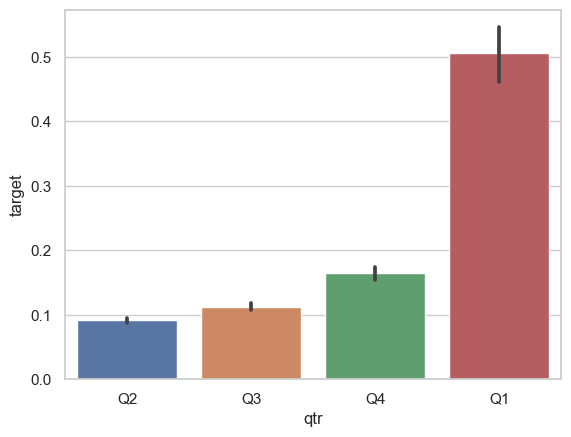

In [32]:
ax = sns.barplot(x="qtr", y="target", data=df, estimator=mean)
## Good predictor 
## At the start of the year Q1(Jan, Feb, Mar) no. of ppl taking a term loan is higher.

In [33]:
df.groupby('qtr')['target'].mean()
### Among ppl who have been targeted in Q1 the likelihood of taking up a tearm loan is 50%

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64

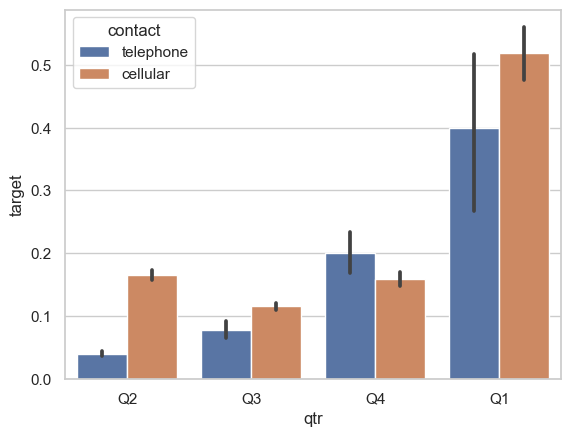

In [34]:
### Checking if the mode of contact with quaterly data has any impact on taking a tearm_loan
ax = sns.barplot(x="qtr", y="target", hue="contact",data=df, estimator=mean)
## Good predictor-- we see that in Q2 cellular is the best mode of communication when compared to telephone

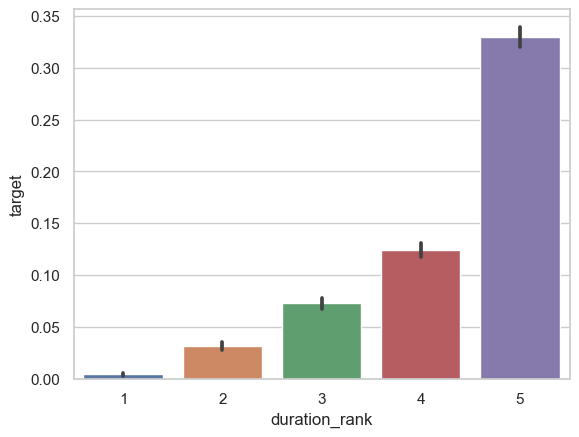

In [35]:
### Checking if duration of contact has any impact on taking a tearm_loan
df['duration_rank']=pd.qcut(df['duration'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="duration_rank", y="target",data=df, estimator=mean)
## its a good predictor but we may not use it because we may not have this data in the futur to predict/analize  

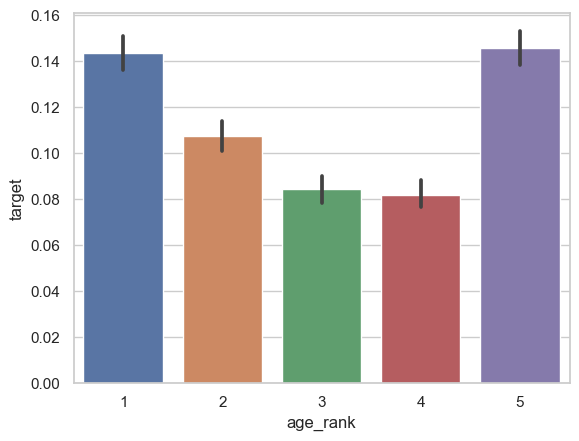

In [36]:
### Checking if age has any impact on taking a tearm_loan
df['age_rank']=pd.qcut(df['age'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="age_rank", y="target",data=df, estimator=mean)
## Not a good predictor 
### the youngest group and the oldest group have highest no. of term deposit subscriptions

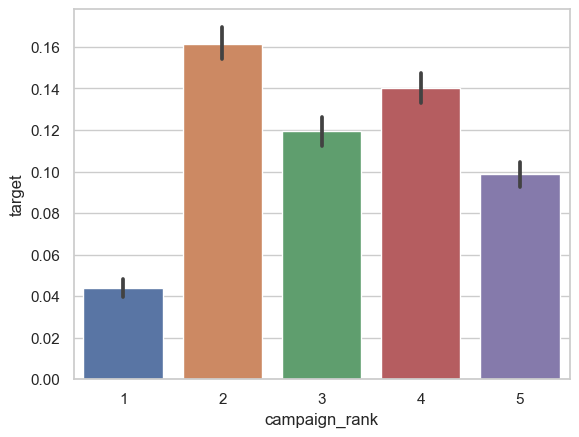

In [37]:
### Checking if campaign has any impact on taking a tearm_loan
df['campaign_rank']=pd.qcut(df['campaign'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="campaign_rank", y="target",data=df, estimator=mean)
## good predictor 

In [38]:
df.groupby('campaign_rank')['target'].mean()

campaign_rank
1    0.043700
2    0.161345
3    0.119325
4    0.140342
5    0.098568
Name: target, dtype: float64

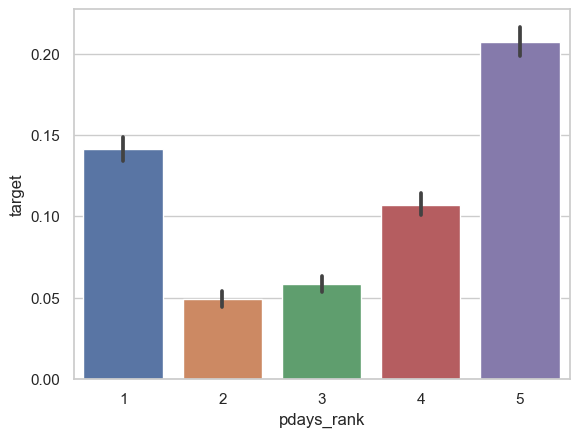

In [39]:
### Checking if pdays has any impact on taking a tearm_loan
df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="pdays_rank", y="target",data=df, estimator=mean)
## good predictor

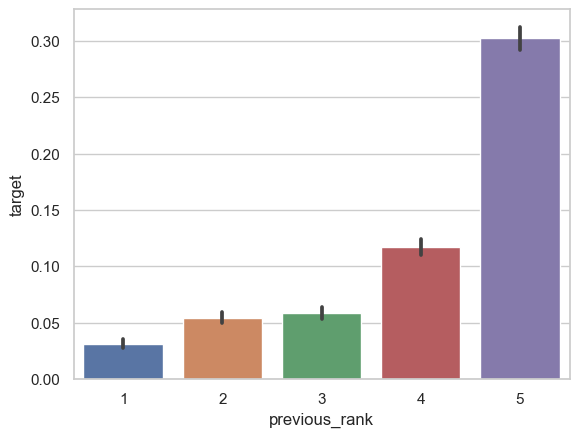

In [40]:
### Checking if previous has any impact on taking a tearm_loan
df['previous_rank']=pd.qcut(df['previous'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="previous_rank", y="target",data=df, estimator=mean)
## very good predictor

In [41]:
df['poutcome_new']=np.where(df['poutcome'].isin(['failure', 'nonexistent']),0,1)
df.groupby('poutcome_new')['target'].mean()
## not a  good predictor

poutcome_new
0    0.094085
1    0.651129
Name: target, dtype: float64

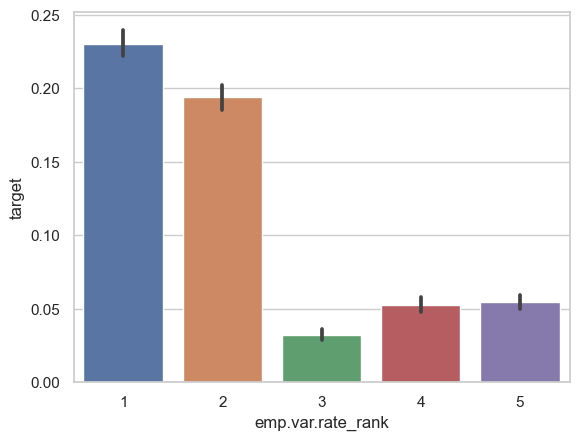

In [42]:
### Checking if emp.var.rate has any impact on taking a tearm_loan
df['emp.var.rate_rank']=pd.qcut(df['emp.var.rate'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="emp.var.rate_rank", y="target",data=df, estimator=mean)
## good predictor

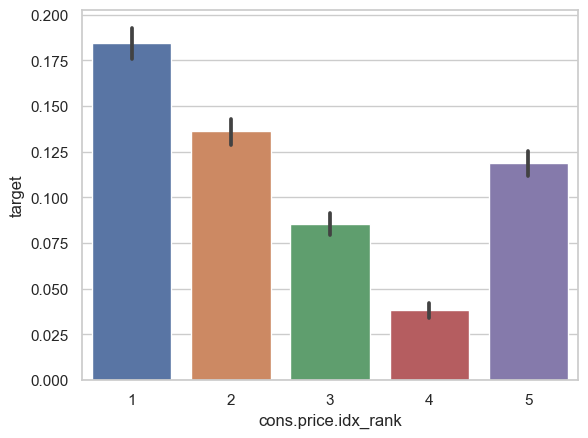

In [43]:
### Checking if cons.price.idx has any impact on taking a tearm_loan
df['cons.price.idx_rank']=pd.qcut(df['cons.price.idx'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="cons.price.idx_rank", y="target",data=df, estimator=mean)
## good predictor 

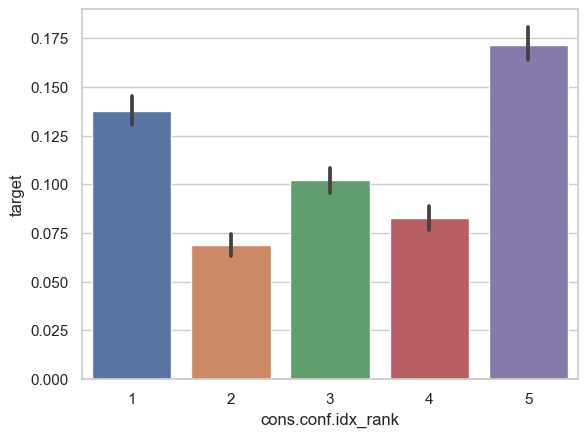

In [44]:
### Checking if cons.conf.idx has any impact on taking a tearm_loan
df['cons.conf.idx_rank']=pd.qcut(df['cons.conf.idx'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="cons.conf.idx_rank", y="target",data=df, estimator=mean)
##good predictor 

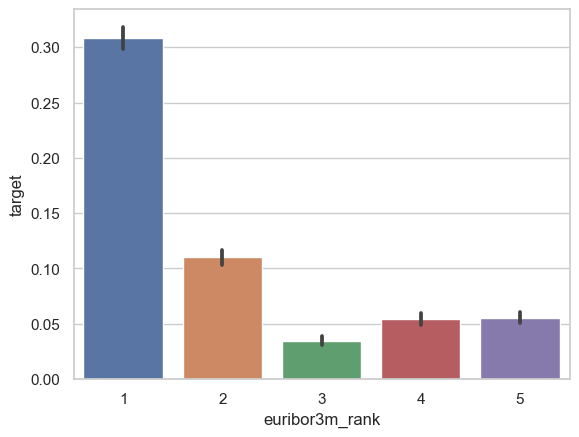

In [45]:
### Checking if euribor3m has any impact on taking a tearm_loan
df['euribor3m_rank']=pd.qcut(df['euribor3m'].rank(method='first').values,5,duplicates='drop').codes+1
ax=sns.barplot(x="euribor3m_rank", y="target",data=df, estimator=mean)
## good predictor 

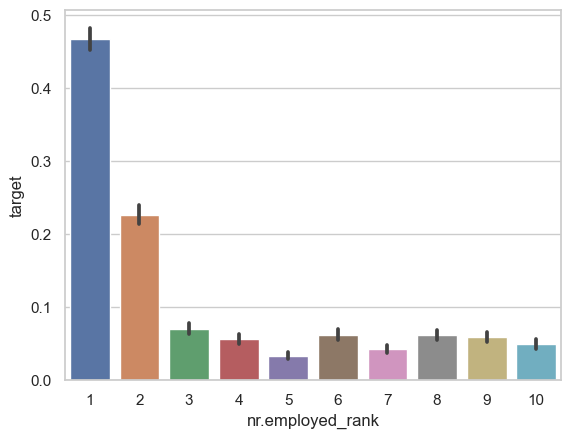

In [69]:
### Checking if nr.employed has any impact on taking a tearm_loan
df['nr.employed_rank']=pd.qcut(df['nr.employed'].rank(method='first').values,10,duplicates='drop').codes+1
from numpy import mean
ax=sns.barplot(x="nr.employed_rank", y="target",data=df, estimator=mean)
##good predictor 

In [89]:
df['nr.employed_rank']

0        4
1        4
2        4
3        4
4        4
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: nr.employed_rank, Length: 41188, dtype: int8

In [92]:
df['employ_rank']=np.where(df['nr.employed_rank'].isin([1]),'A',
                  np.where(df['nr.employed_rank'].isin([2]),'B',
                  np.where(df['nr.employed_rank'].isin([3,4,5,6,7,8,9,10]),'C','x')))

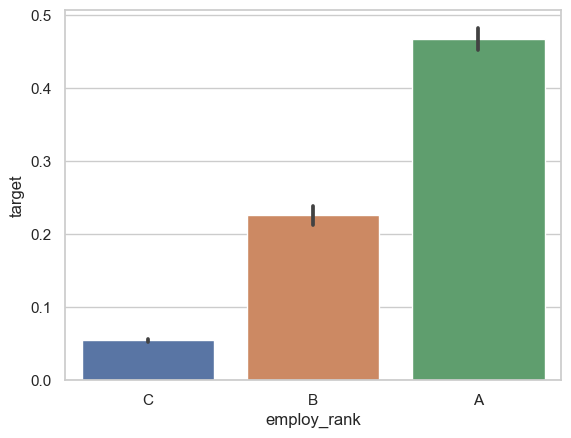

In [94]:
from numpy import mean
ax=sns.barplot(x="employ_rank", y= "target",data=df, estimator=mean)

In [99]:
col_num=['pdays', 'emp.var.rate','euribor3m','previous','campaign','cons.price.idx', 'emp.var.rate']
col_char=['qtr', 'education', 'job','contact','employ_rank']

In [102]:
### OneHotencoded and dummified
X_char_dum=pd.get_dummies(df[col_char], drop_first= True)

In [103]:
X_all=pd.concat([df[col_num], x_char_dum], axis=1, join='inner')

In [104]:
X_var=X_all
Y_var=df['target']

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\Users\varun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:

dtree=DecisionTreeClassifier(criterion ="gini", random_state=100, max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [117]:

rf = RandomForestClassifier(n_estimators=1000, random_state=2, max_features="sqrt", criterion= 'gini', max_depth=2)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=2)

In [124]:
y_pred= logreg.predict(X_test)
print('Logistic regression classifier accuracy on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Logistic regression classifier on test set: 0.90


In [128]:
y_pred_tree=dtree.predict(X_test)
print('Decision Tree classifier accuracy on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Decision Tree classifier accuracy on test set: 0.90


In [127]:
y_pred_rf=rf.predict(X_test)
print('Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Random Forest classifier on test set: 0.89


In [130]:
rf_score_train= rf.score(X_train, y_train)
print(f"Training Score: {rf_score_train}")
rf_score_test= rf.score(X_test, y_test)
print(f"Testing Score: {rf_score_test}")

Training Score: 0.8872047448926502
Testing Score: 0.8876750020231448


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10835   134]
 [ 1117   271]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.67      0.20      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

